In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math

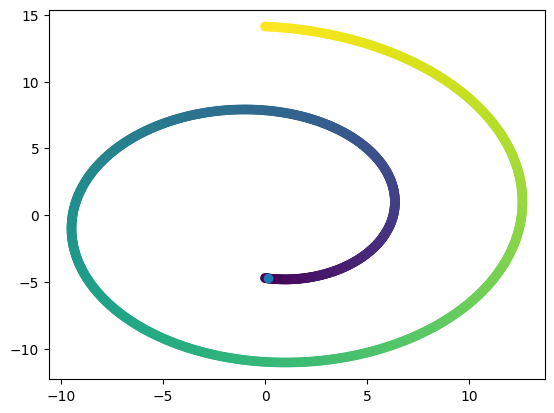

In [42]:
N = 1000

phi = np.linspace(1.5*math.pi, 4.5*math.pi, N)

x = phi*np.cos(phi)
y = phi*np.sin(phi)

X = np.array([x,y]).reshape(2,N).T

plt.scatter(x,y, c = phi)

plt.scatter(X[3,0], X[3,1])


In [71]:
def my_PCA(X, k):
    """
    X: dataframe
        dataframe with n observation and p features, assumed to be already centered (nxp)
    k: int
        number of principal components we want to project on
    output: array-shape
        return the "projection matrix": this is a (p x k) matrix that is used to projecs a dataset of n observations and p features
        to a dataset with n observations and k feature; in particular, the "k most imporant" features of the initial dataset.
        (important according to "preserving varianca" paradigma)
        Remark:
        to actually projects, we have to compute the dot product between the initial nxp dataset and the output (pxk) matrix of this function my_PCA.
        Example:
        X = my_initial_nxp_dataset #assume X is centered
        find_best_k(X) #used to find the best k, call it k_bar
        proj_mtrx = my_PCA(X, k_bar)
        proj_dataset = X.dot(proj_mtrx) # this is the entire initial dataset projected onto the k PCs, so it is a nxk matrix.
    """
  
    cov_mat = np.dot(X.T, X)
    print(cov_mat.shape)

    eig_vals, eig_vecs = np.linalg.eig(cov_mat)

    sorted_indices = np.argsort(eig_vals)[::-1]
    sorted_eigvecs = eig_vecs[:,sorted_indices]
    
    top_k_eigvecs = sorted_eigvecs[:k]
    print(top_k_eigvecs.shape)

    return top_k_eigvecs

(2, 2)
(2, 2)
(2, 1000)
(1000, 2)


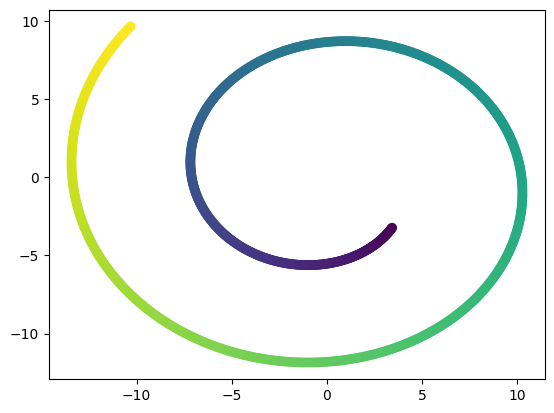

In [72]:
proj = (my_PCA(X,2)).dot(X.T)
print(proj.shape)
print(X.shape)

first_comp = [proj[0][i] for i in range(X.shape[0])]
second_comp = [proj[1][i] for i in range(X.shape[0])]
#second_comp = [0 for i in range(X.shape[0])]


plt.scatter(first_comp, second_comp, c = phi)


In [73]:
X

array([[-8.65651812e-16, -4.71238898e+00],
       [ 4.45460210e-02, -4.72161306e+00],
       [ 8.92660755e-02, -4.73041522e+00],
       ...,
       [ 2.66374241e-01,  1.41157854e+01],
       [ 1.33282051e-01,  1.41271040e+01],
       [ 7.79086631e-15,  1.41371669e+01]])

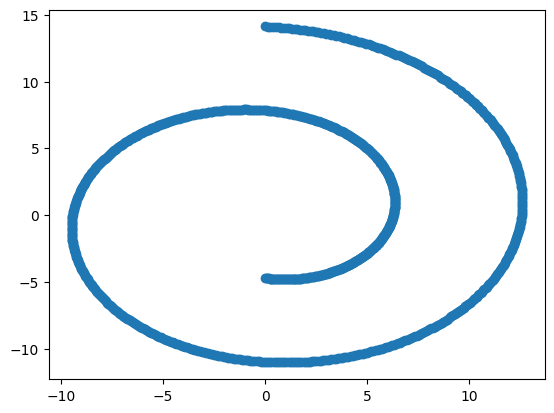

In [78]:
fc = np.array([X[i,0] for i in range(X.shape[0])])
sc = np.array([X[i,1] for i in range(X.shape[0])])

plt.scatter(fc,sc )

In [80]:
# compute parwise distance between each pair of points
n = X.shape[0]
D = np.empty([n, n])
for i in range(n):
    for j in range(n):
        D[i,j] = (X[i, 0] - X[j,0])**2 + (X[i, 1] - X[j,1])**2



array([[0.00000000e+00, 2.06943168e-03, 8.29337771e-03, ...,
        3.54571106e+02, 3.54944261e+02, 3.55305758e+02],
       [2.06943168e-03, 0.00000000e+00, 2.07736132e-03, ...,
        3.54896789e+02, 3.55282010e+02, 3.55655568e+02],
       [8.29337771e-03, 2.07736132e-03, 0.00000000e+00, ...,
        3.55210646e+02, 3.55607969e+02, 3.55993625e+02],
       ...,
       [3.54571106e+02, 3.54896789e+02, 3.55210646e+02, ...,
        0.00000000e+00, 1.78416420e-02, 7.14124062e-02],
       [3.54944261e+02, 3.55282010e+02, 3.55607969e+02, ...,
        1.78416420e-02, 0.00000000e+00, 1.78653675e-02],
       [3.55305758e+02, 3.55655568e+02, 3.55993625e+02, ...,
        7.14124062e-02, 1.78653675e-02, 0.00000000e+00]])